In [2]:
import os
import tensorflow as tf
import pandas as pd
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import Model
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = 'D:/Project_files/ML/Anomaly detection CNN/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed9') #mixed7
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

W1201 20:38:42.483617 16044 deprecation.py:506] From D:\Anaconda3\envs\JupyterPCII\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
last layer output shape:  (None, 3, 3, 2048)


In [7]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(128, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (8, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.00001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [5]:
TRAINING_DIR = 'D:/Project_files/ML/Anomaly detection CNN/train'

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 6400 images belonging to 8 classes.


In [6]:
VALIDATION_DIR = 'D:/Project_files/ML/Anomaly detection CNN/test'

validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))

Found 1600 images belonging to 8 classes.


In [8]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/20
64/64 [==============================] - 488s 8s/step - loss: 2.0237 - acc: 0.1944 - val_loss: 1.9660 - val_acc: 0.2231
Epoch 2/20
64/64 [==============================] - 497s 8s/step - loss: 1.8797 - acc: 0.3272 - val_loss: 1.7836 - val_acc: 0.3125
Epoch 3/20
64/64 [==============================] - 388s 6s/step - loss: 1.7159 - acc: 0.4373 - val_loss: 1.6031 - val_acc: 0.3431
Epoch 4/20
64/64 [==============================] - 463s 7s/step - loss: 1.5499 - acc: 0.5216 - val_loss: 1.4628 - val_acc: 0.3875
Epoch 5/20
64/64 [==============================] - 508s 8s/step - loss: 1.4109 - acc: 0.5755 - val_loss: 1.3744 - val_acc: 0.4412
Epoch 6/20
64/64 [==============================] - 454s 7s/step - loss: 1.2964 - acc: 0.6200 - val_loss: 1.3478 - val_acc: 0.4281
Epoch 7/20
64/64 [==============================] - 498s 8s/step - loss: 1.1977 - acc: 0.6495 - val_loss: 1.3456 - val_acc: 0.4431
Epoch 8/20
64/64 [==============================] - 406s 6s/step - loss: 1.1274 - a

In [9]:
# model.save("D:/Project_files/ML/Anomaly detection CNN/model.h5")
model.save_weights('transfer_weights.h5')

<Figure size 432x288 with 0 Axes>

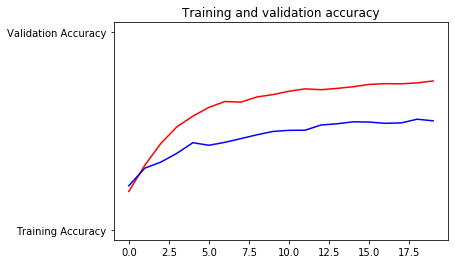

<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

In [29]:
pred = model.predict(validation_generator)